In [1]:
import sqlite3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [2]:
connection = sqlite3.connect("../db.sqlite3")

orders_df = pd.read_sql_query(
    "SELECT * "
    "FROM restaurant_orderitem "
    "INNER JOIN restaurant_product "
    "ON product_id == restaurant_product.id "
    "INNER JOIN restaurant_order "
    "ON order_id == restaurant_order.id",
    connection
)
orders_df = orders_df.drop(columns=["order_id", "product_id"])
orders_df = orders_df.loc[:,~orders_df.columns.duplicated()].copy()

orders_df.to_csv("orders.csv", header=True, index=False)

df = pd.read_csv("orders.csv")
df["datetime"] = pd.to_datetime(df["datetime"])
df

,id,quantity,price,name,datetime
0,1,2,0.80,Plain Papadum,2019-08-03 20:25:00
1,2,1,12.95,King Prawn Balti,2019-08-03 20:25:00
2,3,1,2.95,Garlic Naan,2019-08-03 20:25:00
3,4,1,3.95,Mushroom Rice,2019-08-03 20:25:00
4,5,1,8.95,Paneer Tikka Masala,2019-08-03 20:25:00
...,...,...,...,...,...
74813,74814,2,17.95,House Red wine 75cl,2016-05-18 18:53:00
74814,74815,2,17.95,House Red wine 75cl,2016-05-14 19:28:00
74815,74816,2,17.95,House Red wine 75cl,2016-05-10 13:18:00
74816,74817,1,17.95,House white wine 75cl,2016-04-07 19:04:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

In [3]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f"{pct:.2f}%\n({val:d})"
    return my_autopct

Text(0.5, 1.0, 'Top 10 positions by amount ordered')

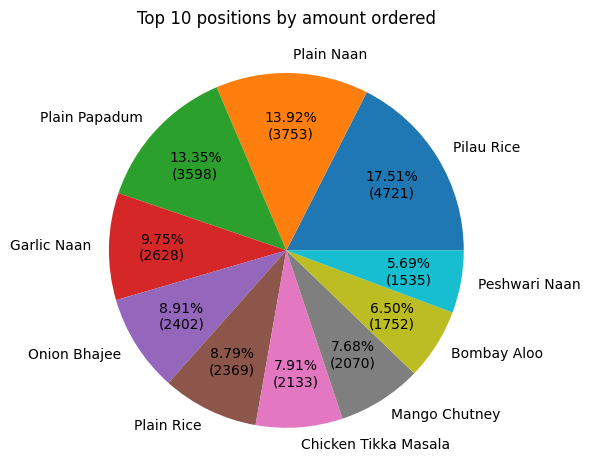

In [4]:
products = df.groupby("name")["quantity"]
top_10_products = products.count().sort_values(ascending=False).head(10)
labels = top_10_products.index.to_list()

plt.pie(
    top_10_products,
    labels=labels,
    autopct=make_autopct(top_10_products),
    radius=1.2,
    pctdistance=0.7,
)
plt.title("Top 10 positions by amount ordered", pad=30)

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

Text(0.5, 1.0, 'Top 10 positions by customers spendings')

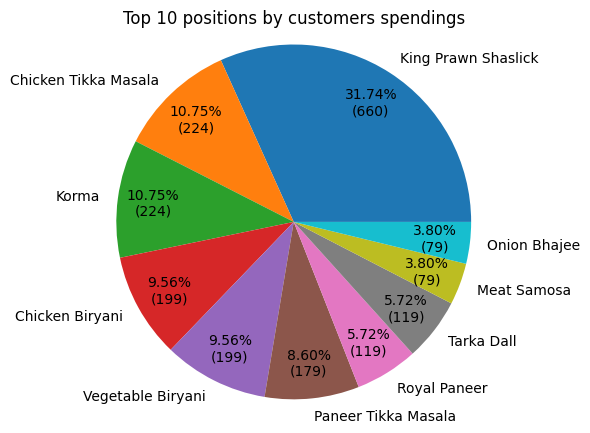

In [5]:
df["item_cost"] = df["price"] * df["quantity"]
top_10_products = df["item_cost"].sort_values(ascending=False).head(10)
labels = top_10_products.index.to_list()

plt.pie(
    top_10_products, 
    labels=df.name[labels], 
    autopct=make_autopct(top_10_products),
    radius=1.2,
    pctdistance=0.8
)
plt.title("Top 10 positions by customers spendings", pad=10)

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

In [6]:
df["order_hour"] = df["datetime"].dt.hour
order_hour_group = df.groupby("order_hour")
order_hour_income = order_hour_group["quantity"].count() * order_hour_group["item_cost"].mean()
order_hour_income

order_hour
0        177.95
1         54.65
2        199.25
3          8.90
4         63.45
5         57.40
6        121.60
8        447.70
9        570.60
10      1250.35
11      3807.05
12     10565.85
13      8282.65
14      3343.55
15      3781.70
16     15634.75
17     72110.20
18    132462.50
19    109045.05
20     50218.25
21     21480.30
22     11001.50
23       373.25
dtype: float64

Text(0, 0.5, 'Income, USD')

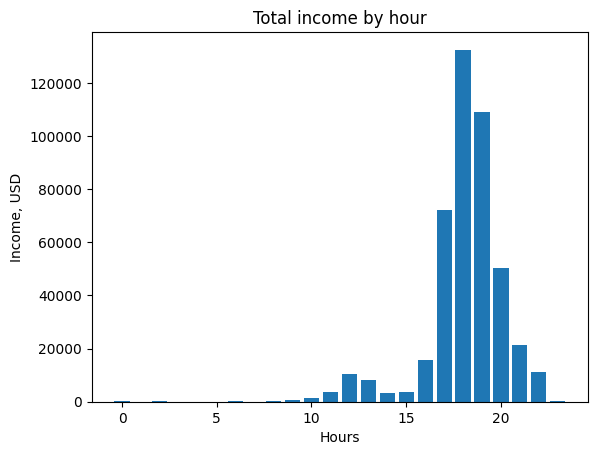

In [7]:
x = order_hour_income.index.to_list()
y = order_hour_income

plt.bar(x, y)

plt.title("Total income by hour")
plt.xlabel("Hours")
plt.ylabel("Income, USD")

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

In [8]:
df["order_weekday"] = df["datetime"].dt.weekday
order_weekday_group = df.groupby("order_weekday")
order_weekday_income = order_weekday_group["quantity"].count() * order_weekday_group["item_cost"].mean()
order_weekday_income

order_weekday
0     40008.30
1     38145.65
2     41246.20
3     46021.55
4    100339.15
5    112191.65
6     67105.95
dtype: float64

([<matplotlib.axis.XTick at 0x1b058350>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

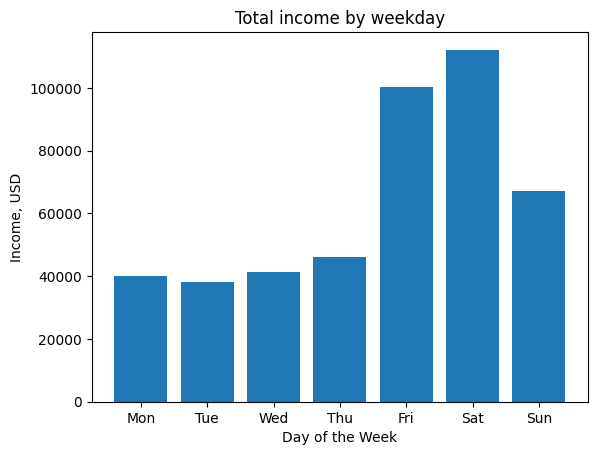

In [9]:
plt.bar(order_weekday_income.index.to_list(), order_weekday_income)

plt.title("Total income by weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Income, USD")
plt.xticks(np.arange(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])